In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from myUtils.converter import *
from matplotlib import pyplot
import pandas as pd
import numpy as np

from myUtils.sequences_treatment import *

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, SimpleRNN#, Dropout, Embedding, Masking, Bidirectional
from keras.optimizers import Adam

ModuleNotFoundError: No module named 'myUtils.converter'

In [21]:
T=5
numberSamples=100
n=1
m=1
generatorType='random01'

#A=np.array([[1]])
#C=np.array([[1]])
#Q=np.array([[1]])*0.5
#R=np.array([[1]])*0

(x,y)=generateSequence(T,numberSamples=numberSamples,n=n,m=m,generatorType=generatorType)
#(x,y)=dynamicSequence(T,A,C,Q,R,numberSamples=numberSamples)

sigma=randomSigma(T,numberSamples=numberSamples,p0=0.8)
yc=corruptSequence_outOfRange(y,sigma)

print('shape x =',np.shape(x),'\nshape y =',np.shape(y),'\nshape yc=',np.shape(yc))

#print('x=\n',x)
#print('y=\n',y)
#print('sigma=\n',sigma)
#print('yc=\n',yc)

shape x = (100, 5, 1) 
shape y = (100, 5, 1) 
shape yc= (100, 5, 1)


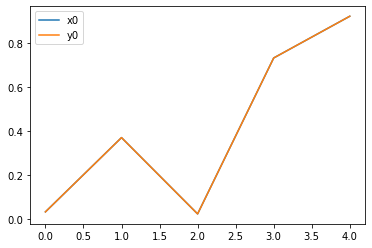

In [22]:
pyplot.plot(x[0,:,0],label='x0')
#pyplot.plot(x[0,:,1],label='x1')
pyplot.plot(y[0,:,0],label='y0')
#pyplot.plot(y[0,:,1],label='y1')
pyplot.legend()
pyplot.show()

In [23]:
model=Sequential()
model.add(LSTM(20,input_shape=(None,m),return_sequences=True))
model.add(LSTM(20,return_sequences=True))
model.add(Dense(n,activation=None))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 20)          1760      
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           21        
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [24]:
inf_model = convert_to_inference_model(model)

In [37]:
ind=0
yc_test=yc[ind,:,:].reshape(1,T,1)
yc_test.shape

(1, 5, 1)

In [48]:
yp_stateless = model.predict(yc_test)
print(yp_stateless)

[[[-0.01233658]
  [-0.0298596 ]
  [-0.03470935]
  [-0.02466426]
  [-0.03009231]]]


In [51]:
for t in range(5):
    yp_stateful = inf_model.predict(yc_test[:,t:t+1,:])
    print(yp_stateful)

[[[-0.01233658]]]
[[[-0.0298596]]]
[[[-0.03470935]]]
[[[-0.02466426]]]
[[[-0.03009231]]]


In [50]:
inf_model.reset_states()

In [6]:
history=model.fit(x=yc,y=x,batch_size=1,epochs=1,validation_split=0.2,verbose=2)

Train on 80 samples, validate on 20 samples
Epoch 1/1
 - 6s - loss: 0.1372 - val_loss: 0.0975


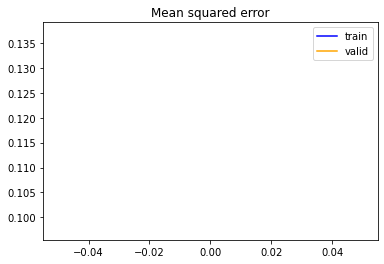

<module 'matplotlib.pyplot' from '/export/share/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [7]:
# plot loss
plotRNNresults(history)

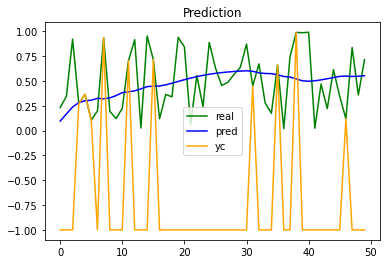

In [8]:
indToPlot=0

# plot prediction
x_pred=model.predict(yc[indToPlot:(indToPlot+1),:,:])

pyplot.title('Prediction')
pyplot.plot(x[indToPlot,:,0], color='green', label='real')
pyplot.plot(x_pred[0,:,0], color='blue', label='pred')
pyplot.plot(yc[indToPlot,:,0], color='orange', label='yc')
pyplot.legend()
pyplot.show()